In [26]:
import geopandas as gpd
import pandas as pd
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
from rasterio.plot import show

In [27]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires')
fire_data_classified = pd.read_csv('fires_data_classified.csv')

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\geospatial_internship\\datasets')
telangana_shape = gpd.read_file('telangana_shapefile.geojson')

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
district_boundaries = gpd.read_file('District_Boundary.shp')

In [28]:
fire_data = fire_data_classified[fire_data_classified['agricultural'] == 1]
len(fire_data)

6371

In [29]:
#Create geodataframe from the data
geo_fire_data = gpd.GeoDataFrame(fire_data,geometry = gpd.points_from_xy(fire_data.longitude,fire_data.latitude), crs = {'init': 'epsg:4326'}) 

#Make sure the
geo_fire_data['geometry'] = geo_fire_data['geometry'].geometry.to_crs(epsg = 4326)
district_boundaries['geometry'] = district_boundaries['geometry'].geometry.to_crs(epsg = 4326)

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [30]:
#Load data in correclty
geo_fire_data['acq_date'] =  pd.to_datetime(geo_fire_data['acq_date'])
geo_fire_data['year'] = (geo_fire_data['acq_date']).dt.year

In [31]:
def fires_year_plot(data, year):
    telangana_shape.plot()
    fires_year = data[data['year'] == year]
    plt.scatter(fires_year.longitude, fires_year.latitude, c='red', edgecolor = 'black')
    plt.title('Fires Telangana Year ' + str(year))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    return(plt.show())

In [32]:
def choropleth_fires_year(geo_points, geo_polygon, year):
    fires_per_district = gpd.sjoin(geo_points, geo_polygon, how="inner", op='intersects')
    fires_per_district_count = fires_per_district.groupby(['Dist_Name', 'year', 'Area'])['fireID'].count().reset_index()
    fires_per_district_count['Normalized'] = fires_per_district_count['fireID'] / (fires_per_district_count['Area'])
    fires_per_district_count[fires_per_district_count['year'] == year]
    new_geo = pd.merge(district_boundaries, fires_per_district_count, on = 'Dist_Name')
    new_geo.plot(column = 'Normalized', cmap = 'Blues', edgecolor = 'black', legend = True)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Amount of Fires per District in Year ' + str(year))
    return(plt.show())

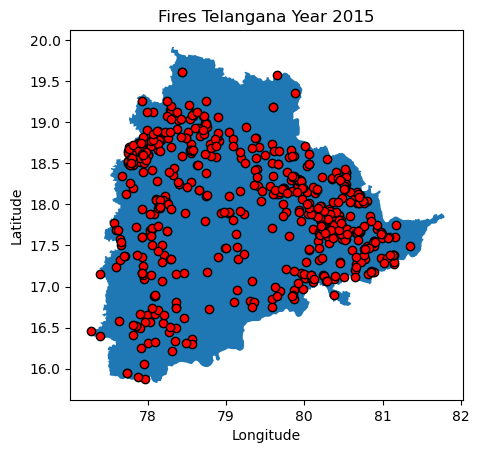

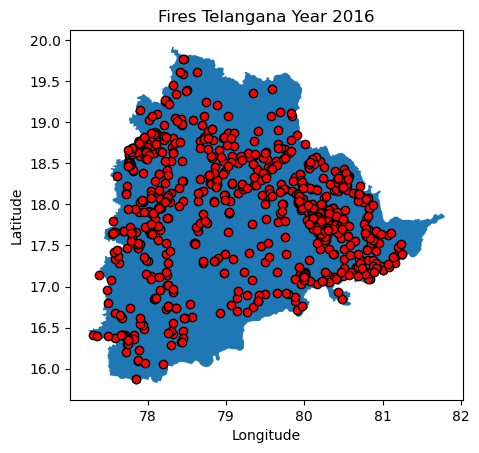

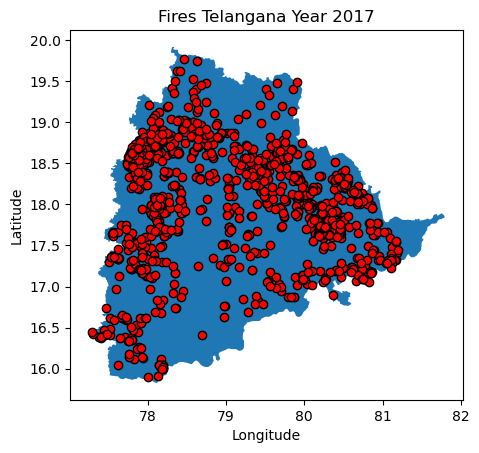

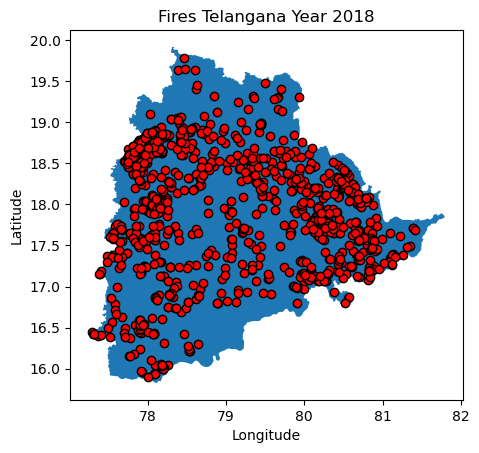

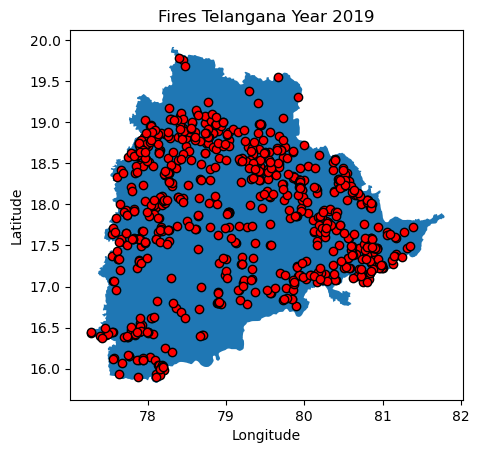

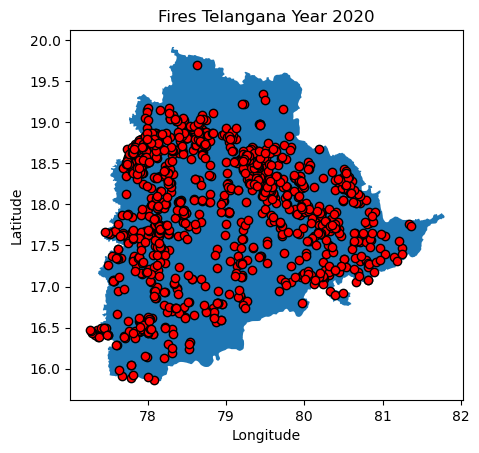

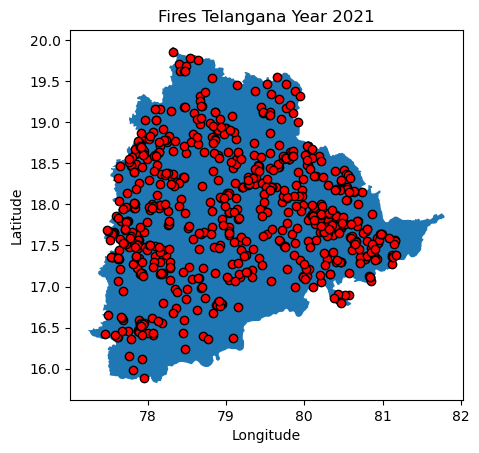

In [33]:
for i in geo_fire_data['year'].unique():
    fires_year_plot(geo_fire_data, i)

<ipython-input-32-69b8742c41f7>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  fires_per_district = gpd.sjoin(geo_points, geo_polygon, how="inner", op='intersects')


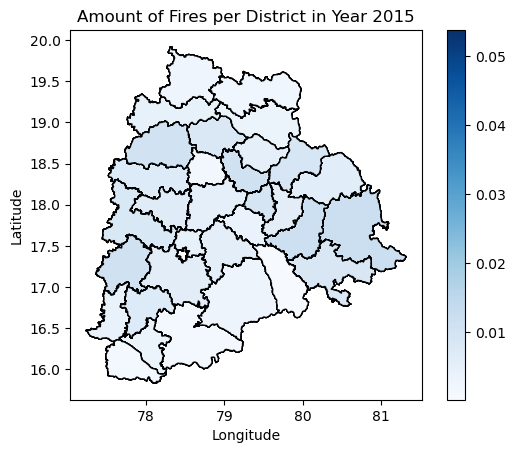

<ipython-input-32-69b8742c41f7>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  fires_per_district = gpd.sjoin(geo_points, geo_polygon, how="inner", op='intersects')


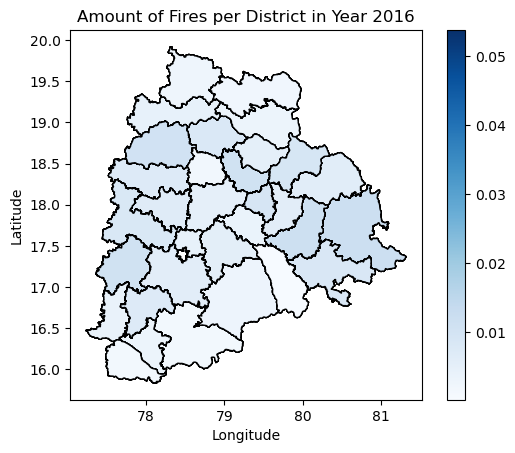

<ipython-input-32-69b8742c41f7>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  fires_per_district = gpd.sjoin(geo_points, geo_polygon, how="inner", op='intersects')


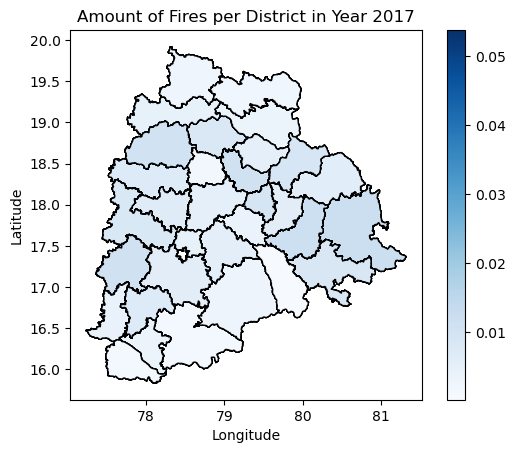

<ipython-input-32-69b8742c41f7>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  fires_per_district = gpd.sjoin(geo_points, geo_polygon, how="inner", op='intersects')


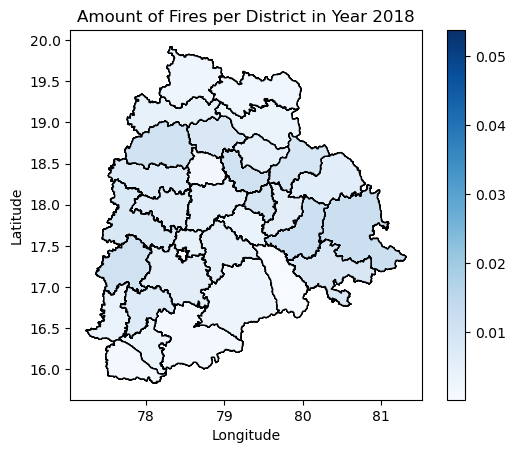

<ipython-input-32-69b8742c41f7>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  fires_per_district = gpd.sjoin(geo_points, geo_polygon, how="inner", op='intersects')


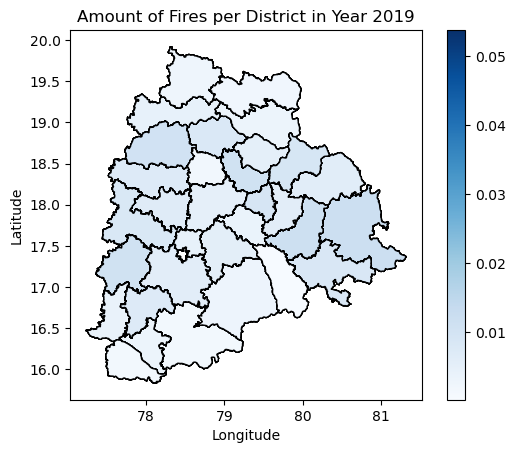

<ipython-input-32-69b8742c41f7>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  fires_per_district = gpd.sjoin(geo_points, geo_polygon, how="inner", op='intersects')


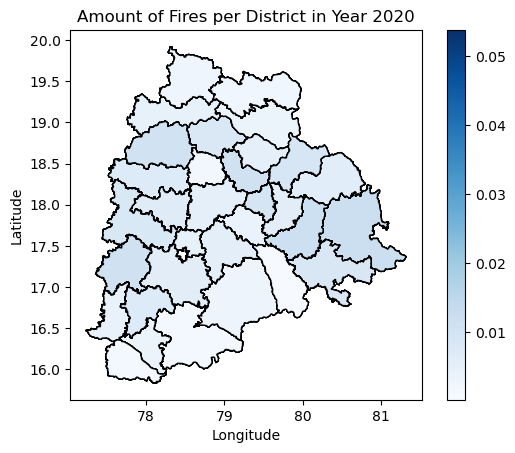

<ipython-input-32-69b8742c41f7>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  fires_per_district = gpd.sjoin(geo_points, geo_polygon, how="inner", op='intersects')


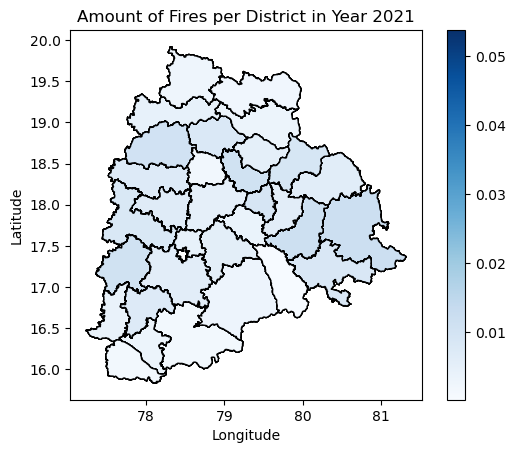

In [34]:
 for i in geo_fire_data['year'].unique():
    choropleth_fires_year(geo_fire_data, district_boundaries, i)